In [1]:
import os

In [2]:
import cv2

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
path=r"C:\Users\ADMIN\Documents\DEEP LEARNING\train"

In [6]:
category=["cat","dog"]

In [7]:
data=[]
for i in category:
    folder=os.path.join(path,i)
    
    if i=="cat":
        label =0
    else:
        label =1
        
    
    for image in os.listdir(folder):
        filepath=os.path.join(folder,image)
        img_arr=cv2.imread(filepath)
        img_arr=cv2.resize(img_arr,(100,100))
        data.append([img_arr,label])

In [8]:
len(data)

25000

In [9]:
import random

In [10]:
random.shuffle(data)

In [11]:
x=[]
y=[]

for i in data:
    x.append(i[0])
    y.append(i[1])
    


In [12]:
from matplotlib import pyplot as plt

In [13]:
y

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [14]:
y=np.array(y)

In [15]:
x=np.array(x)

In [16]:
from sklearn.model_selection import train_test_split as tt

In [17]:
x_train,y_train,x_test,y_test=tt(x,y,random_state=1,test_size=0.50)

In [18]:
from keras.layers import *

In [19]:
from keras.models import Sequential


In [20]:
model=Sequential()

In [21]:
model.add(Conv2D(64,(3,3),input_shape=(100,100,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [22]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [ ]:
model.fit(x,y,batch_size=500,epochs=10,verbose=1)
## YOU CAN IMPROVE ITS ACCURACY USING GD HYPERPARAMETER TUNING

Epoch 1/10


In [ ]:
model.predict(x[0].reshape(1,100,100,3)).round()

# MODEL SAVING

In [24]:
path=r"C:\Users\ADMIN\Documents\DEEP LEARNING"

In [25]:
a=os.path.join(path,"kittenh.jfif")

In [26]:
p=cv2.imread(a)

In [27]:
p=cv2.resize(p,(100,100))

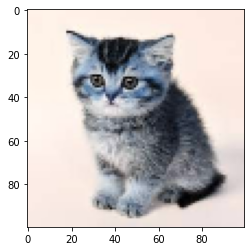

In [28]:
plt.imshow(p,cmap="pink")

In [32]:
model.predict(p.reshape(1,100,100,3)).round()

array([[0.]], dtype=float32)

In [31]:
model=keras.models.load_model("covid19.h5")

In [30]:
import keras